In [1]:
knitr::opts_chunk$set(echo=TRUE)
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)
setwd("D:/Dataset/Uber-dataset/Uber-dataset")


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
colours = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")

In [3]:
apr_data <- read.csv("1uber-raw-data-apr14.csv")
may_data <- read.csv("1uber-raw-data-may14.csv")
jun_data <- read.csv("1uber-raw-data-jun14.csv")
jul_data <- read.csv("1uber-raw-data-jul14.csv")
aug_data <- read.csv("1uber-raw-data-aug14.csv")
sep_data <- read.csv("1uber-raw-data-sep14.csv")

data_2014 <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)



In [4]:
data_2014

Date.Time,Lat,Lon,Base
<chr>,<dbl>,<dbl>,<chr>
4/1/2014 0:11:00,40.7690,-73.9549,B02512
4/1/2014 0:17:00,40.7267,-74.0345,B02512
4/1/2014 0:21:00,40.7316,-73.9873,B02512
4/1/2014 0:28:00,40.7588,-73.9776,B02512
4/1/2014 0:33:00,40.7594,-73.9722,B02512
4/1/2014 0:33:00,40.7383,-74.0403,B02512
4/1/2014 0:39:00,40.7223,-73.9887,B02512
4/1/2014 0:45:00,40.7620,-73.9790,B02512
4/1/2014 0:55:00,40.7524,-73.9960,B02512


In [5]:
data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")

In [6]:
data_2014

Date.Time,Lat,Lon,Base
<dttm>,<dbl>,<dbl>,<chr>
2014-04-01 00:11:00,40.7690,-73.9549,B02512
2014-04-01 00:17:00,40.7267,-74.0345,B02512
2014-04-01 00:21:00,40.7316,-73.9873,B02512
2014-04-01 00:28:00,40.7588,-73.9776,B02512
2014-04-01 00:33:00,40.7594,-73.9722,B02512
2014-04-01 00:33:00,40.7383,-74.0403,B02512
2014-04-01 00:39:00,40.7223,-73.9887,B02512
2014-04-01 00:45:00,40.7620,-73.9790,B02512
2014-04-01 00:55:00,40.7524,-73.9960,B02512


In [7]:
data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")

In [8]:
data_2014

Date.Time,Lat,Lon,Base,Time
<dttm>,<dbl>,<dbl>,<chr>,<chr>
2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00
2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00
2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00
2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00
2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00
2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00
2014-04-01 00:39:00,40.7223,-73.9887,B02512,00:39:00
2014-04-01 00:45:00,40.7620,-73.9790,B02512,00:45:00
2014-04-01 00:55:00,40.7524,-73.9960,B02512,00:55:00


In [9]:
#data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)

In [10]:
data_2014$day <- factor(day(data_2014$Date.Time))
data_2014$month <- factor(month(data_2014$Date.Time, label = TRUE))
data_2014$year <- factor(year(data_2014$Date.Time))
data_2014$dayofweek <- factor(wday(data_2014$Date.Time, label = TRUE))

In [11]:
data_2014$hour <- factor(hour(hms(data_2014$Time)))
data_2014$minute <- factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))

In [12]:
hour_data <- data_2014 %>%
           group_by(hour) %>%
               dplyr::summarize(Total = n()) 
datatable(hour_data)

HTML widgets cannot be represented in plain text (need html)

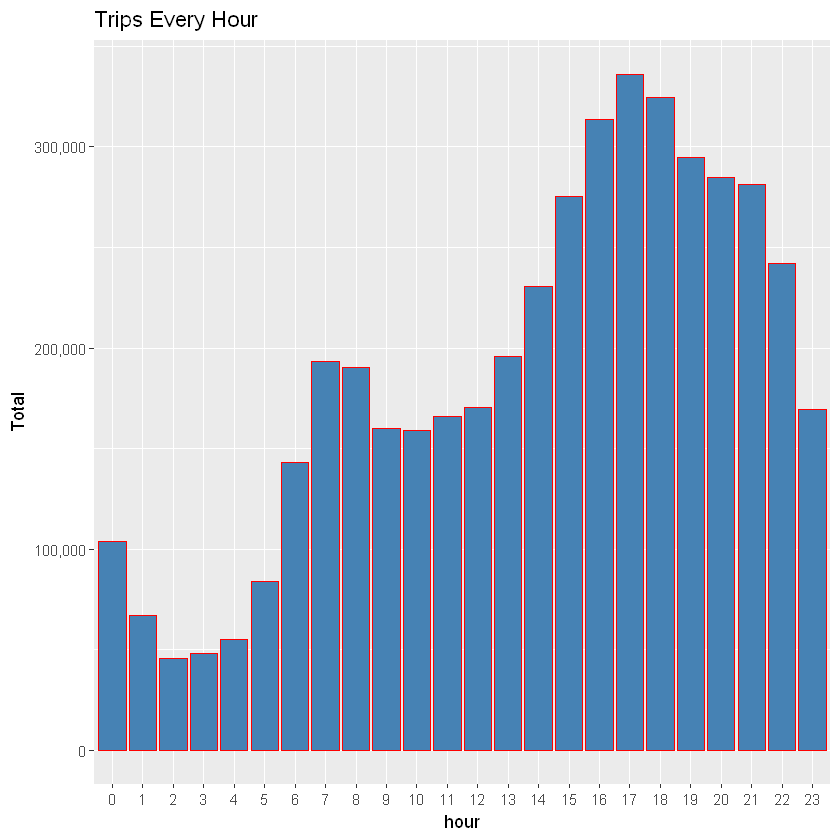

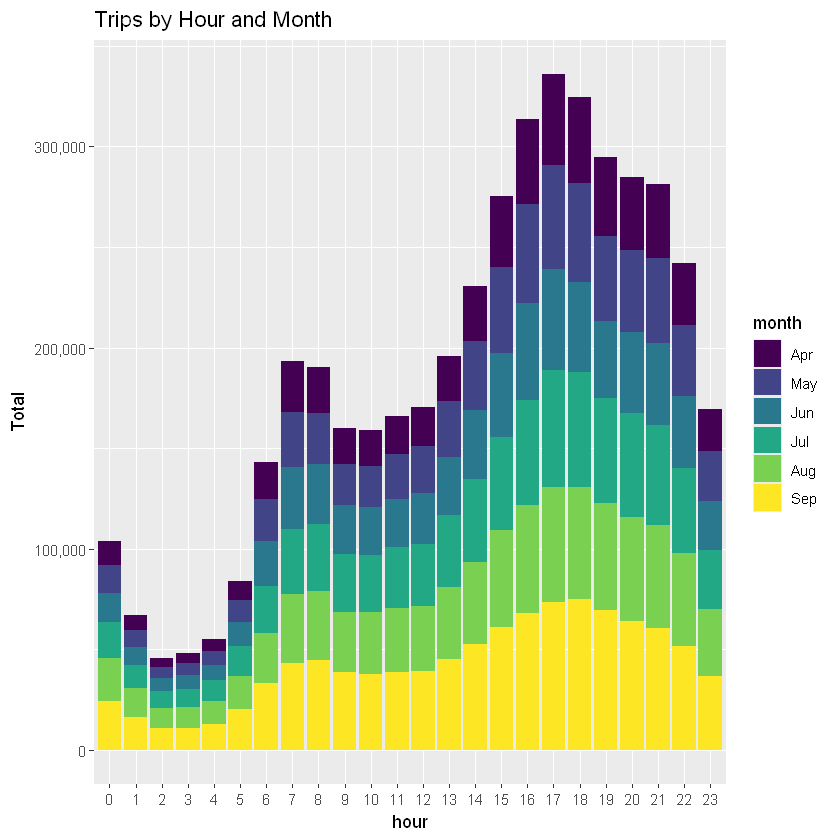

In [13]:
ggplot(hour_data, aes(hour, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue", color = "red") +
           ggtitle("Trips Every Hour") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

month_hour <- data_2014 %>%
          group_by(month, hour) %>%
             dplyr::summarize(Total = n(), .groups = "drop")

ggplot(month_hour, aes(hour, Total, fill = month)) + 
       geom_bar( stat = "identity") +
          ggtitle("Trips by Hour and Month") +
           scale_y_continuous(labels = comma)

In [14]:
day_group <- data_2014 %>%
          group_by(day) %>%
             dplyr::summarize(Total = n()) 
datatable(day_group)

HTML widgets cannot be represented in plain text (need html)

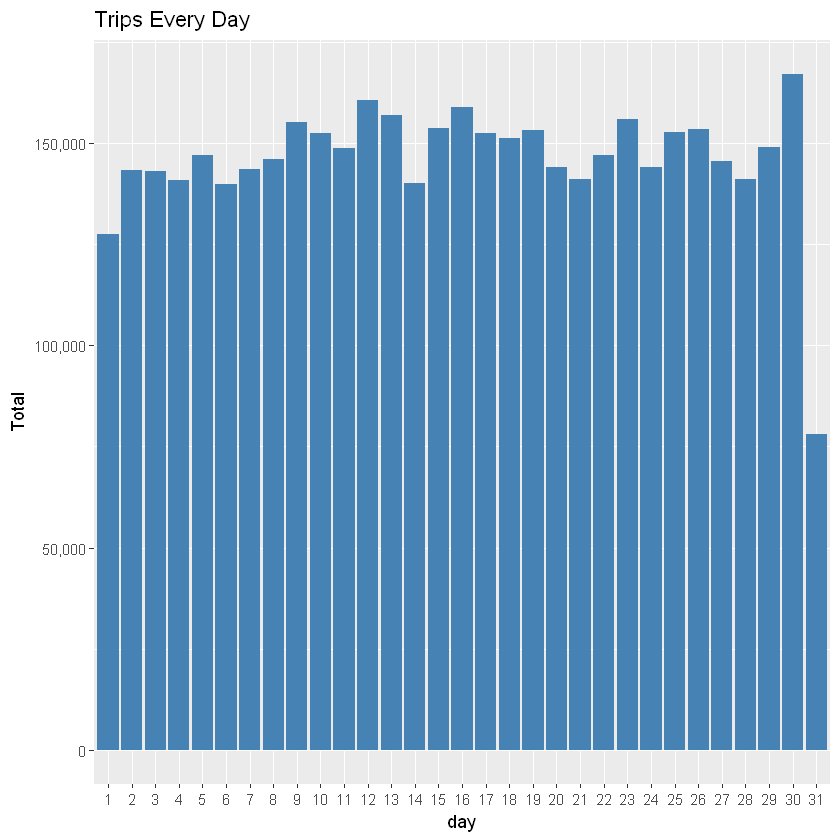

In [15]:
ggplot(day_group, aes(day, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue") +
           ggtitle("Trips Every Day") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

`summarise()` has grouped output by 'day'. You can override using the `.groups` argument.


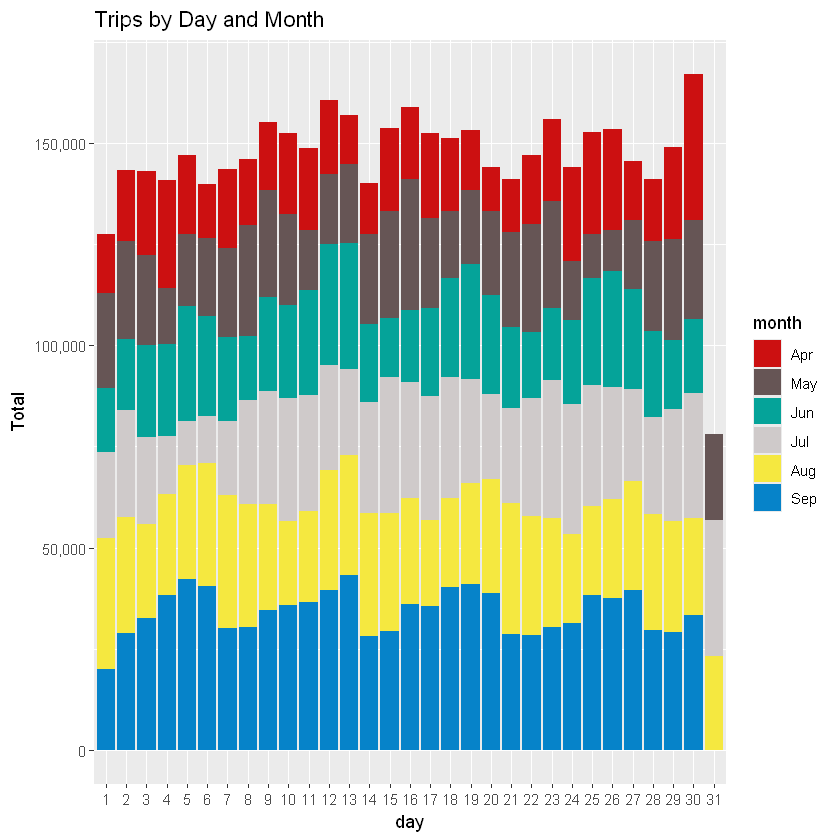

In [16]:
day_month_group <- data_2014 %>%
    group_by(day, month) %>%
    dplyr::summarize(Total = n())

ggplot(day_month_group, aes(day, Total, fill = month)) + 
    geom_bar( stat = "identity") +
    ggtitle("Trips by Day and Month") +
    scale_y_continuous(labels = comma) +
    scale_fill_manual(values = colours)
            

In [17]:
month_group <- data_2014 %>%
          group_by(month) %>%
             dplyr::summarize(Total = n(), .groups="drop") 
datatable(month_group)

HTML widgets cannot be represented in plain text (need html)

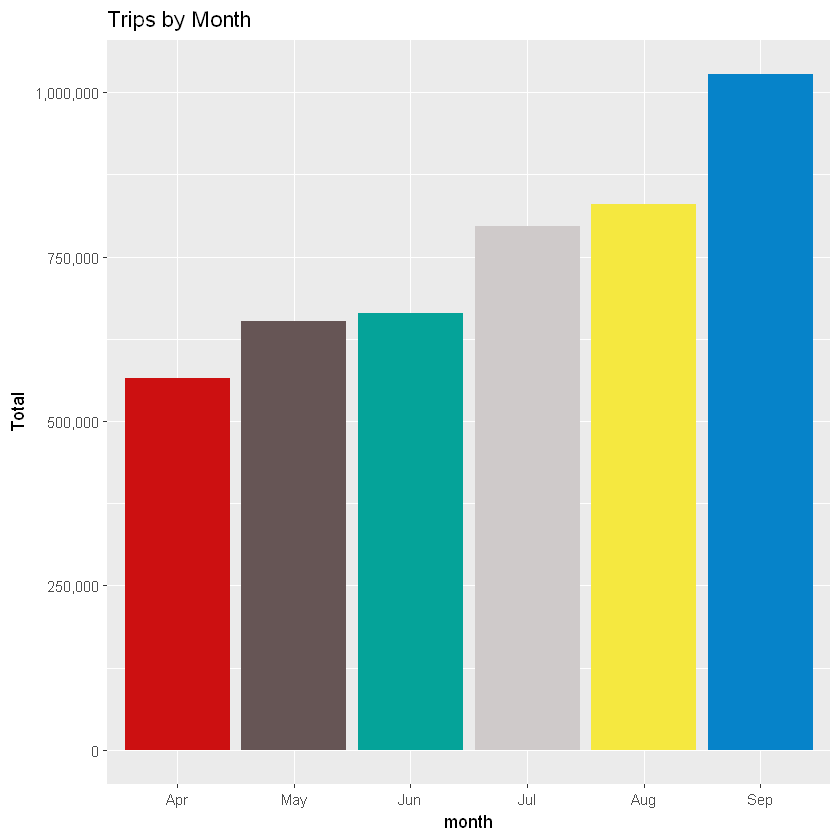

In [31]:
ggplot( month_group, aes(month, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Month") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colours)

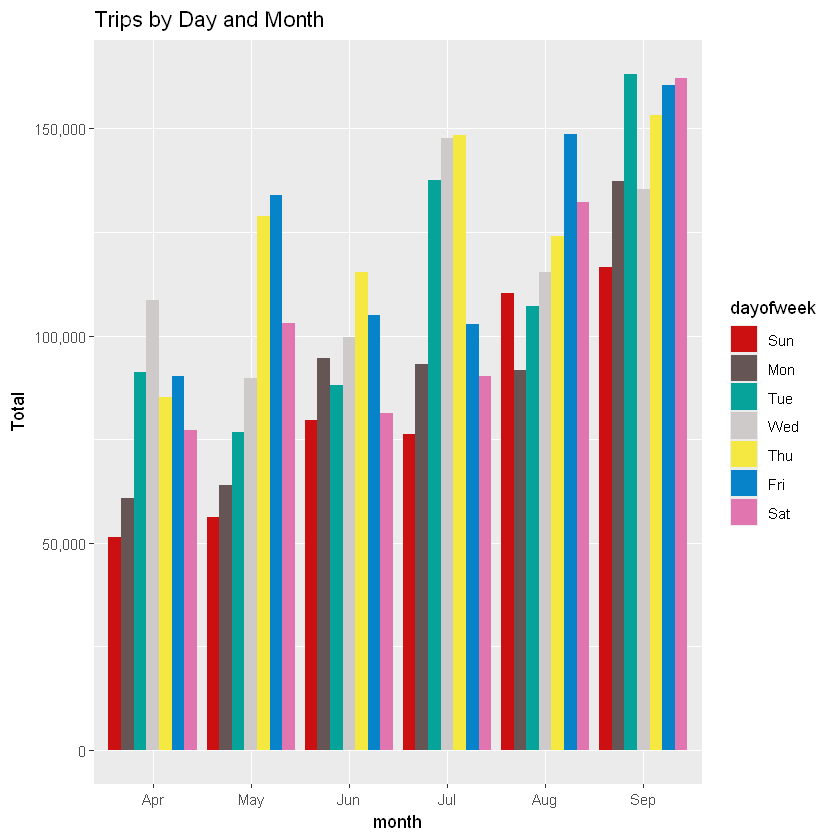

In [19]:
month_weekday <- data_2014 %>%
    group_by(month, dayofweek) %>%
    dplyr::summarize(Total = n(),.groups="drop")
ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
       geom_bar( stat = "identity", position = "dodge") +
          ggtitle("Trips by Day and Month") +
           scale_y_continuous(labels = comma) +
           scale_fill_manual(values = colours)

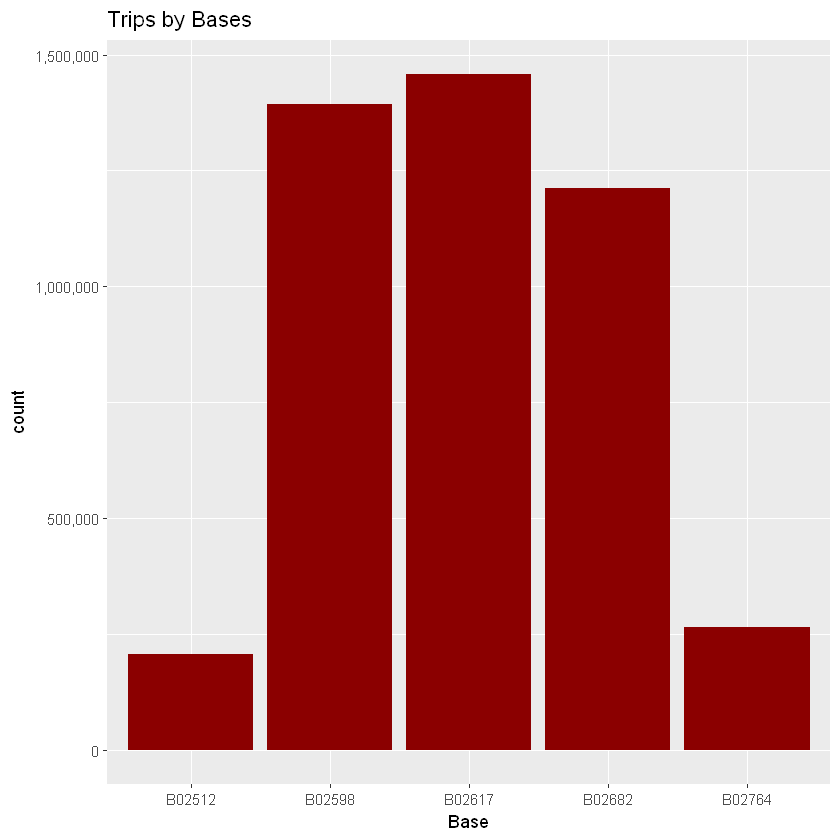

In [20]:
ggplot(data_2014, aes(Base)) + 
 geom_bar(fill = "darkred") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases")

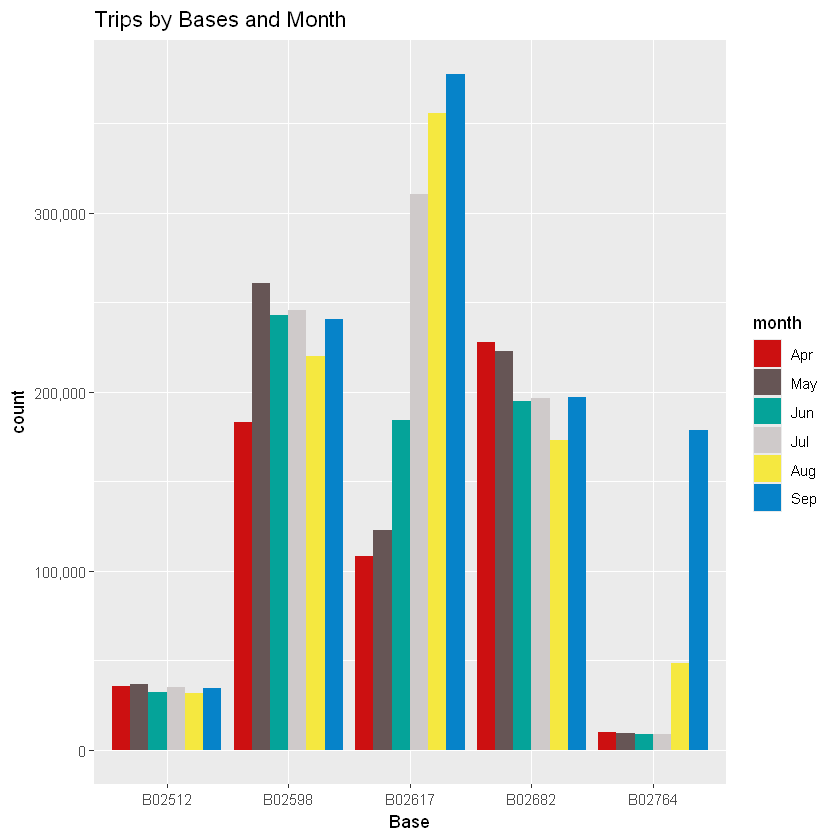

In [21]:
ggplot(data_2014, aes(Base, fill = month)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and Month") +
 scale_fill_manual(values = colours)

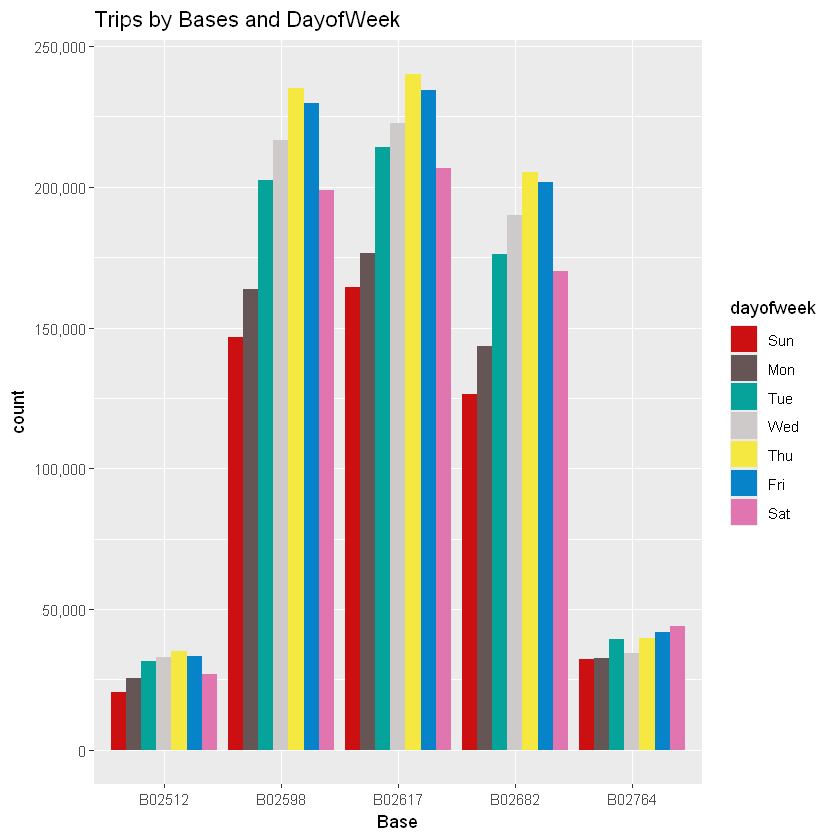

In [22]:
ggplot(data_2014, aes(Base, fill = dayofweek)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and DayofWeek") +
 scale_fill_manual(values = colours)

In [23]:
day_and_hour <- data_2014 %>%
         group_by(day, hour) %>%
            dplyr::summarize(Total = n(), .groups="drop")

datatable(day_and_hour)

HTML widgets cannot be represented in plain text (need html)

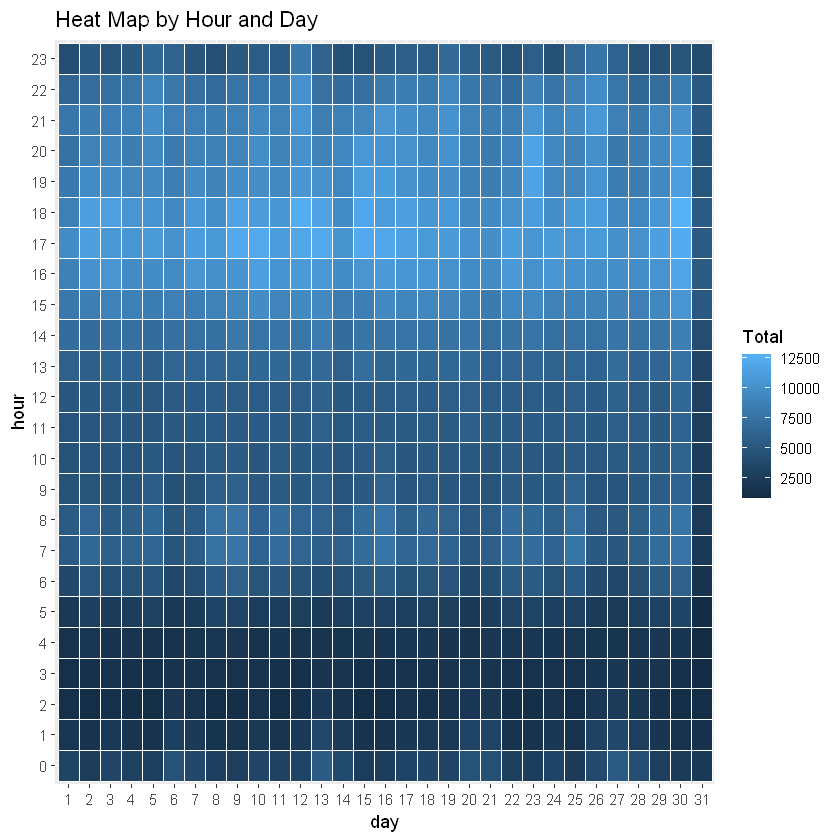

In [24]:
ggplot(day_and_hour, aes(day, hour, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Hour and Day")

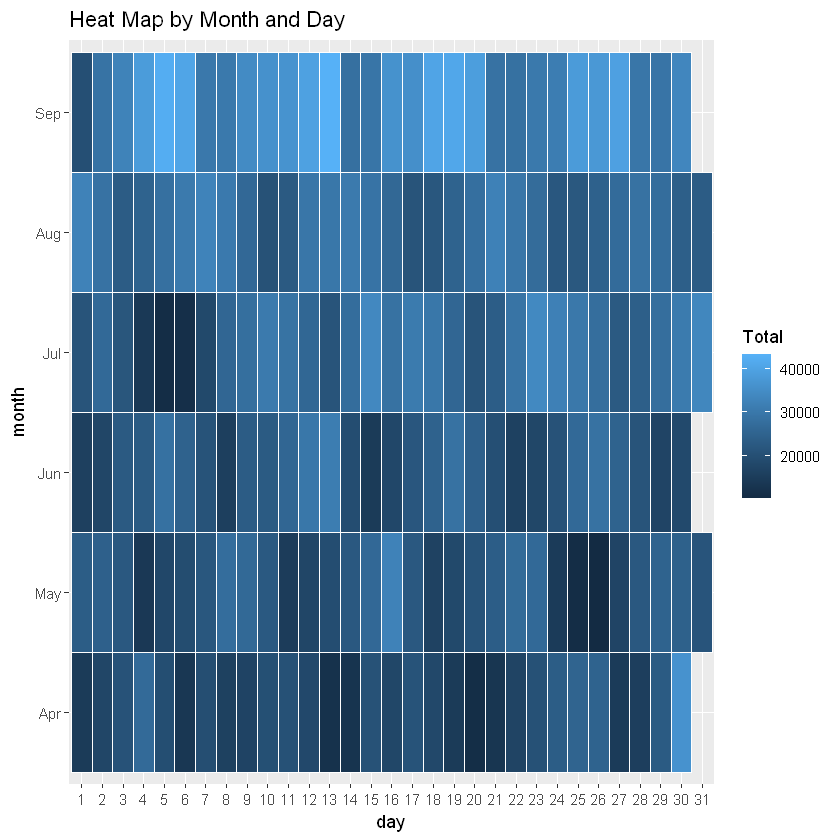

In [25]:
ggplot(day_month_group, aes(day, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day")

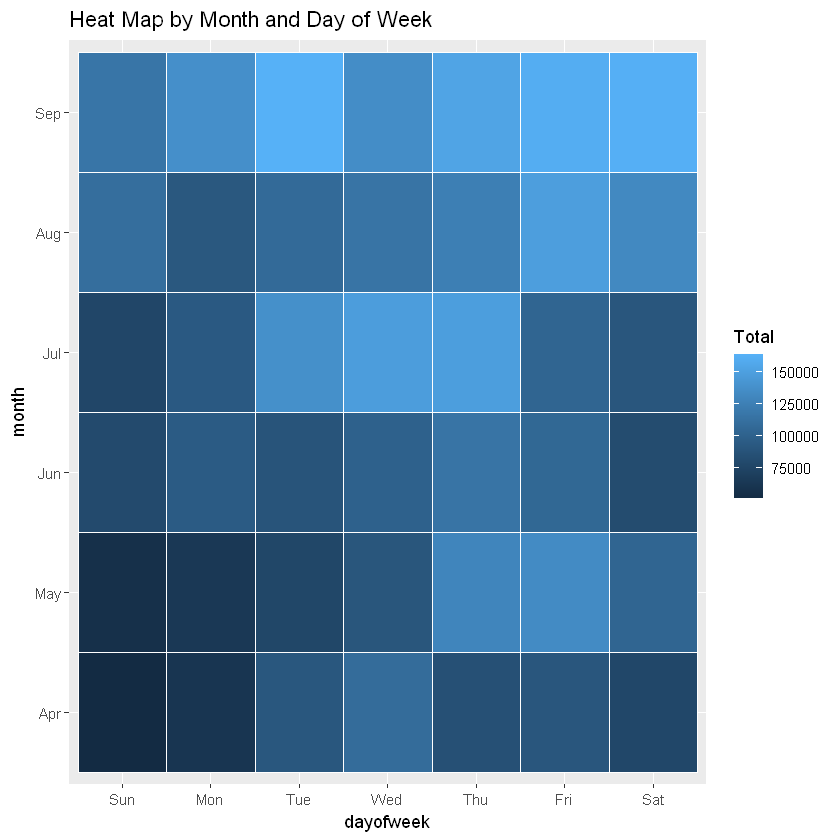

In [26]:
ggplot(month_weekday, aes(dayofweek, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day of Week")

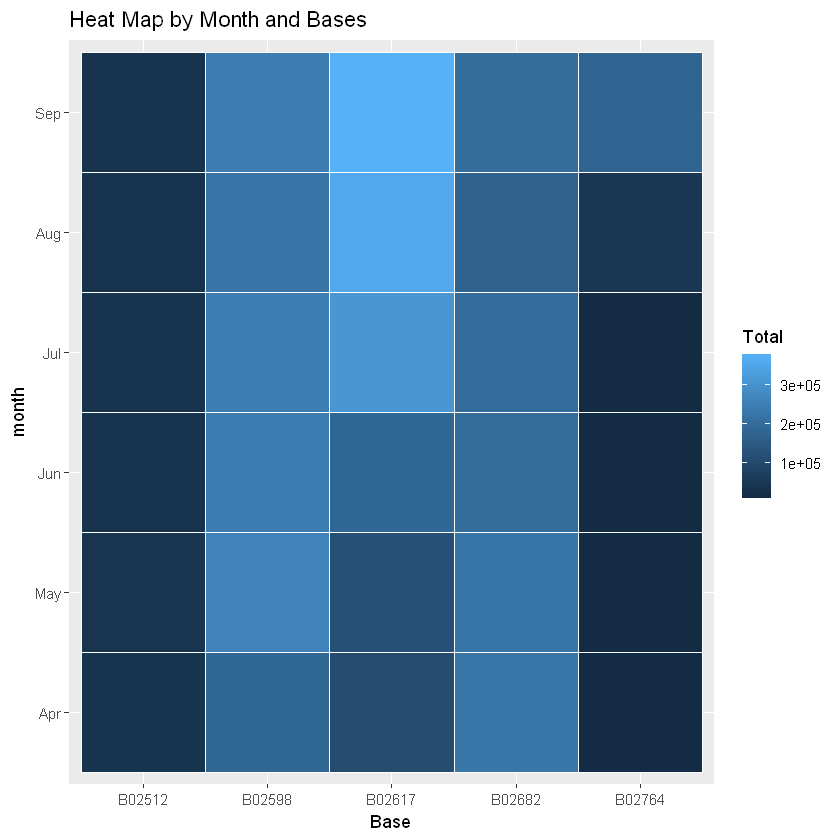

In [27]:
month_base <-  data_2014 %>%
                    group_by(Base, month) %>%
                        dplyr::summarize(Total = n(), .groups="drop") 

day0fweek_bases <-  data_2014 %>%
                    group_by(Base, dayofweek) %>%
                        dplyr::summarize(Total = n(), .groups="drop") 

ggplot(month_base, aes(Base, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Bases")

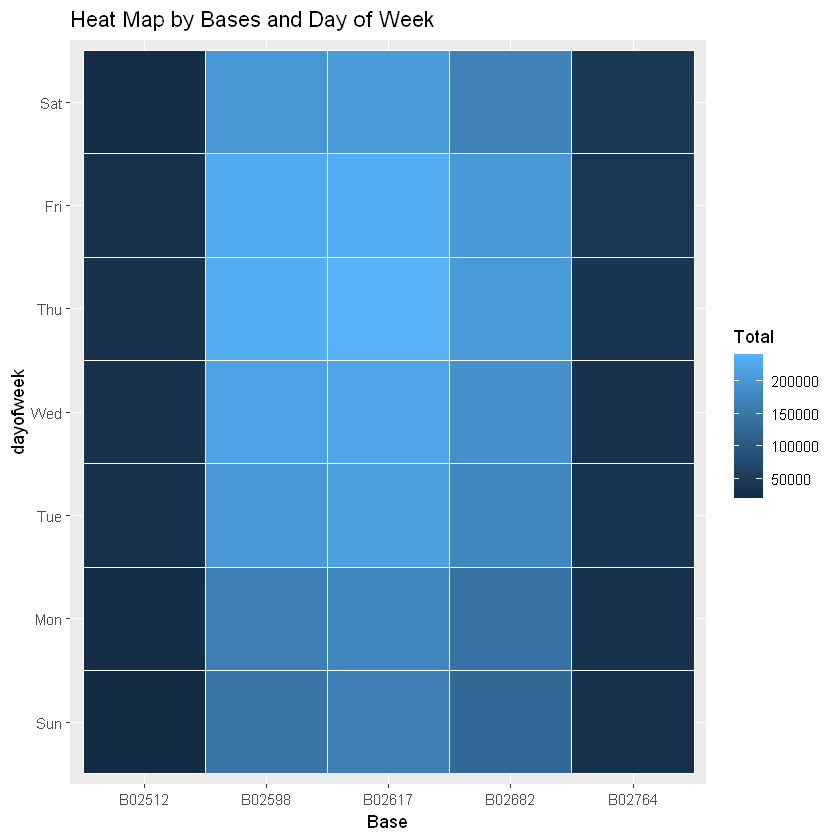

In [28]:
ggplot(day0fweek_bases, aes(Base, dayofweek, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Bases and Day of Week")

Warning message:
"Removed 71701 rows containing missing values or values outside the scale range (`geom_point()`)."


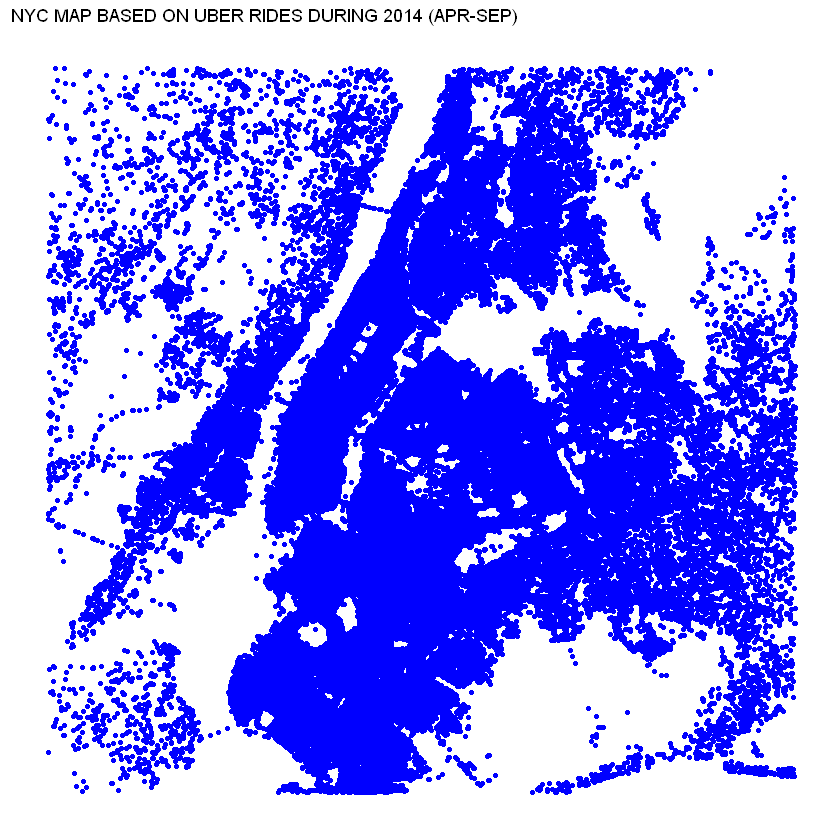

In [29]:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.1500
max_long <- -73.7004

ggplot(data_2014, aes(x=Lon, y=Lat)) +
  geom_point(size=1, color = "blue") +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
        theme_map() +
           ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)")

#ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) +
#  geom_point(size=1) +
#     scale_x_continuous(limits=c(min_long, max_long)) +
#      scale_y_continuous(limits=c(min_lat, max_lat)) +
#       theme_map() +
#          ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")

Warning message:
"Removed 71701 rows containing missing values or values outside the scale range (`geom_point()`)."


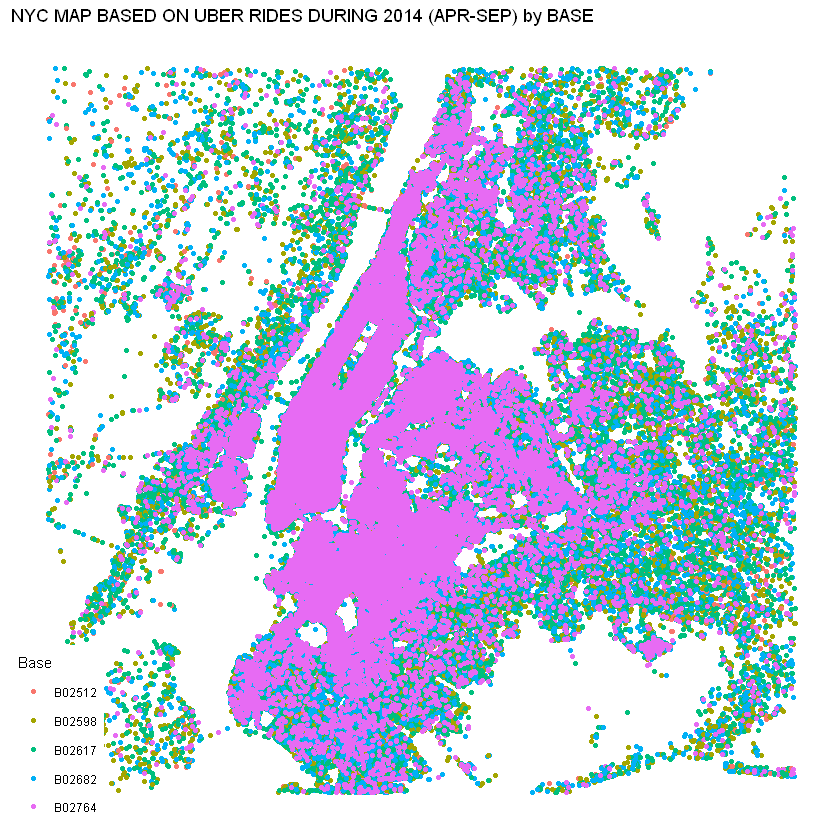

In [30]:
ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) +
  geom_point(size=1) +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
       theme_map() +
          ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")